# Unicorn Companies Data Analysis Project

## Introduction

In this project, I will act as a Data Analyst & a member of an analytics at a fictious investing firm, McGovern Wealth Group. To help them decide which companies to invest in next fiscal year, the firm wants insights into the latest **unicorn companies**–companies that are valued at over one billion dollars. The data that I will use for this task provides information on over 1,000 unicorn companies, including their industry, country, year founded, and select investors. I will use this information to gain insights into how and when companies reach this prestigious milestone, make recommentations for next steps to the investing firm, and answer the following questions:

1. Which unicorn companies have had the biggest return on investment?
2. How long does it usually take for a company to become a unicorn?
3. Which industries have the most unicorns?
4. Which countries have the most unicorns?
5. Which investors have funded the most unicorns?


## Step 1: Imports

### Importing required libraries and packages 

First, I will import relevant Python libraries and modules in a single cell.

In [1]:
# Importing libraries and packages

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Load the dataset into a DataFrame

The dataset provided is in the form of a csv file named `Unicorn_Companies.csv` and contains a subset of data on unicorn companies. 

In [2]:
# Importing relevant dataset & converting to a DataFrame.

companies = pd.read_csv("unicorn_companies.csv")

## Step 2: Data exploration

Next, I will explore the dataset and I will start by displaying the first 10 rows of the data to get an understanding of how the dataset is structured.

In [3]:
# Displaying the first 10 rows of the data

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Assessing the size of the dataset

Getting a sense of how large the dataset is. The `size` property that DataFrames have can help.

In [4]:
# Assessing the size of the dataset

companies.size

10740

### Determine the shape of the dataset

Identifying the number of rows and columns in the dataset. The `shape` property that DataFrames have can help.

In [5]:
# Determining the shape of the dataset

companies.shape

(1074, 10)

### Getting basic information about the dataset

To further understand what the dataset entails, getting basic information about the dataset, including the data type of values in each column. There is more than one way to approach this task. In this instance, I will use the `info()` function from `pandas`.

In [6]:
# Getting basic information aobut the Dataset

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


# Step 3: Cleaning Data

#### Handling duplicate rows

The business mentioned that no company should appear in the data more than once. I will verify that this is indeed the case, and if not, I will clean the data so each company appears only once. I will begin by checking which, if any, companies are duplicated.


In [7]:
# Isolating rows of all companies that have duplicates

companies[companies.duplicated(subset='Company', keep= False)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
40,Bolt,$11B,5/29/18,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments"
44,Bolt,$11B,10/8/21,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic"


I'd classify it under the problematic data category because most of the data in the rows are similar, except for some incomplete and missing entries. Plus, the company 'Bolt' is only one which is under the Unicorn Status in the world, so it is classified as a duplicate entry and should be dropped from the dataset.

In [8]:
# Drop rows of duplicate companies after their first occurrence

companies = companies.drop_duplicates(subset= 'Company', keep= 'first')

In [9]:
# Check to See If duplicates are dropped

companies[companies.duplicated(subset= ['Company'], keep= False)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors


### Finding missing values

Now I will check to see if there are missing values which should be taken care of or not. 

In [10]:
# Find the number of missing values in each column in this dataset.

companies.isna().sum() 

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

According to the dataset, there are sixteen and one missing value in the `City` and `Select Investors` column. There are ways to handle the missing values, either to fill it, send it back to the data owner, keep them, or simply delete them from the dataframe. Such steps should be taken after having discussion with the stakeholders. For this project, I will delete them.

### Reviewing rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. Displaying all rows with missing values from `companies`. 

In [11]:
# 1. Applying the `isna()` and `any()` method to the `companies` dataframe and assigning back to `mask` to check out the rows with missing values

mask = companies.isna().any(axis=1)
companies[mask]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."


Now, removing all rows containing missing values for this project.

In [12]:
# Drop the rows containing missing values and then check to see whether there are NaN values remaining or not

companies = companies.dropna()
companies.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country/Region      0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------

# Step 4: Structuring Data

### Converting the `Date Joined` column to datetime

Using the `to_datetime()` function from the `pandas` library to convert the `Date Joined` column to datetime. This splits each value into year, month, and date components.

In [13]:
# Using pd.to_datetime() to convert Date Joined column to datetime & adding it to a new column.

companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

### Creating a `Year Joined` column

It will be common to encounter situations where I will need to compare the year joined with the year founded. So, the `Date Joined` column does not just have year — it has the year, month, and date. So, I will extract the year component from the `Date Joined` column and add those year components into a new column to keep track of each company's year joined.

In [14]:
# Using .dt.year to extract year component from Date Joined column & adding it to a new column.

companies['Year Joined'] = companies['Date Joined'].dt.year

### Creating a `Month Joined` column

I will obtain the names of the months when companies gained unicorn status, and use the result to create a `Month Joined` column. 

In [15]:
# Obtaining the names of the months when companies gained unicorn status & I will use the result to create a `Month Joined` column.

companies['month name'] = companies['Date Joined'].dt.month_name()

### Create a `Years To Join` column

Determine how many years it took for companies to reach unicorn status, and use the result to create a `Years To Join` column. Adding this to the dataset can help you answer questions you may have about this aspect of the companies.

In [16]:
# Determining how many years it took for companies to reach unicorn status & using the result to create a `Years To Join` column.

companies['Years To Join'] = companies['Date Joined'].dt.year - companies['Year Founded']

#### Correcting bad data in `Years to Join` column

Firstly, I will generate descriptive statistics for the `Years To Unicorn` column only.

In [17]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,month name,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6


In [18]:
# Identify and correct the issue with Years To Unicorn.

companies['Years To Join'].describe()


count    1056.000000
mean        7.019886
std         5.356892
min        -4.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Join, dtype: float64

In this column, the minimum value is -4 which is incorrect as the year value cannot be in negative. So, I will first isolate all rows where the `Years To Unicorn` column contains a negative value.

In [19]:
# Isolate any rows where `Years To Unicorn` is negative

mask = companies['Years To Join'] < 0

companies[mask]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,month name,Years To Join
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",2017,October,-4


An internet search revealed that InVision was founded in 2011. So, I will replace the value at `Year Founded` with `2011` for InVision's row. 

In [20]:
# Replace InVision's `Year Founded` value with 2011 and the `Years To Join` to 6

companies['Year Founded'].iloc[527] = 2011
companies['Years To Join'].iloc[527] = 6

# Verify the change was made properly

companies.iloc[527]


C:\Users\farru\AppData\Local\Temp\ipykernel_13500\2156355921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies['Year Founded'].iloc[527] = 2011
C:\Users\farru\AppData\Local\Temp\ipykernel_13500\2156355921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies['Years To Join'].iloc[527] = 6


Company                                                      ReCharge
Valuation                                                         $2B
Date Joined                                       2021-05-06 00:00:00
Industry                                                      Fintech
City                                                      Los Angeles
Country/Region                                          United States
Continent                                               North America
Year Founded                                                     2011
Funding                                                         $277M
Select Investors    ICONIQ Growth, Bain Capital Ventures, Summit P...
Year Joined                                                      2021
month name                                                        May
Years To Join                                                       6
Name: 534, dtype: object

Now I will check with the value if it is corrected or not.

In [21]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,month name,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6


### Creating a `Valuation Number` column

For each country, I want to calculate the sum of all valuations of companies from that country. However, in order to do this, I will need to first prepare the data. Currently, the data in the `Valuation` column is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, pandas cannot perform mathematical operations on its values. The data in this column needs to be converted to a numeric datatype. 

In this step, I will define a function called `str_to_num()` that will do it for me.

In [22]:
# Defining the `str_to_num()` function

def str_to_num(x):
    x = x.strip('$B')
    x = int(x)
    return x

Now, I will use this function to create a new column called `valuation_num` that represents the `Valuation` column as an integer value. To do this, I will use the series method `apply()` to apply the `str_to_num()` function to the `Valuation` column.

In [23]:
# Apply the `str_to_num()` function to the `Valuation` column and assign the result back to a new column called `valuation_num`.

companies['Valuation Number'] = companies['Valuation'].apply(str_to_num)


#### Issues with `Industry` labels

The company provided you with the following list of industry labels to identify in the data for `Industry`. 

**Note:** Any labels in the `Industry` column that are not in `industry_list` are misspellings.

In [24]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

First, I will check if there are values in the `Industry` column that are not in `industry_list`. If so, what are they?

In [25]:
# Checking which values are in `Industry` but not in `industry_list`

x = companies['Industry'].values
y = industry_list

z = set(x) - set(y)
print(z)


{'Artificial Intelligence'}


Now I will replace the Incorrect values with the correct ones via a dictionary

In [26]:
# 1. Create `replacement_dict`

replacement_dict = {'Artificial intelligence' : 'Artificial Intelligence'}

# 2. Replace the incorrect values in the `Industry` column

companies['Industry'] = companies['Industry'].replace(replacement_dict)

# 3. Verify that there are no longer any elements in `Industry` that are not in `industry_list`

companies['Industry'].unique()


array(['Artificial Intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications'], dtype=object)

## Step 4: Results and evaluation

### Taking a sample of the data

It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. But you may encounter scenarios in the future where you will need to take a sample of the data due to time and resource limitations. For the purpose of developing the skills around sampling, I will take a sample of the data and work with that sample for the next steps of analysis you want to conduct.

I will use `sample()` with the `n` parameter set to `50` to randomly sample 50 unicorn companies from the data. Additionally, I will specify the `random_state` parameter to ensure reproducibility of your work and will save the result to a variable called `companies_sampled`.

In [27]:
# Sample the data

companies_sampled = companies.sample(n=50, random_state= 42)
companies_sampled.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,month name,Years To Join,Valuation Number
265,Infra.Market,$3B,2021-02-25,E-commerce & direct-to-consumer,Thane,India,Asia,2016,$274M,"Accel, Tiger Global Management, Nexus Venture ...",2021,February,5,3
842,Rubicon,$1B,2017-08-25,Other,Atlanta,United States,North America,2008,$223M,"Goldman Sachs, Leonardo DiCaprio, Promecap",2017,August,9,1
857,Aircall,$1B,2021-06-23,Internet software & services,New York,United States,North America,2014,$226M,"Balderton Capital, Next World Capital, Draper ...",2021,June,7,1
1024,Sift,$1B,2021-04-22,Artificial Intelligence,San Francisco,United States,North America,2011,$157M,"Union Square Ventures, Insight Partners, Spark...",2021,April,10,1
90,Rippling,$7B,2020-08-04,Internet software & services,San Francisco,United States,North America,2017,$447M,"Initialized Capital, Y Combinator, Kleiner Per...",2020,August,3,7


### Visualizing the maximum unicorn company valuation per industry

Visualizing unicorn companies' maximum valuation for each industry represented in the sample. To create a bar plot to visualize this, use the `bar()` function from the `matplotlib.pyplot` module. Before plotting, I will create a new dataframe which will have company's name and the valuation in integer format. Then, use this new column to plot the data.

In [28]:
# Creating a column representing company valuation as numeric data
max_valuation_per_industry = companies[['Industry','Valuation Number']]
max_valuation_per_industry = max_valuation_per_industry.groupby(['Industry']).max().sort_values('Valuation Number', ascending = False)
max_valuation_per_industry = max_valuation_per_industry.reset_index()

max_valuation_per_industry

,Industry,Valuation Number
0,Artificial Intelligence,180
1,E-commerce & direct-to-consumer,100
2,Other,100
3,Fintech,95
4,Internet software & services,40
5,"Supply chain, logistics, & delivery",39
6,Consumer & retail,38
7,Data management & analytics,38
8,Edtech,22
9,Health,13


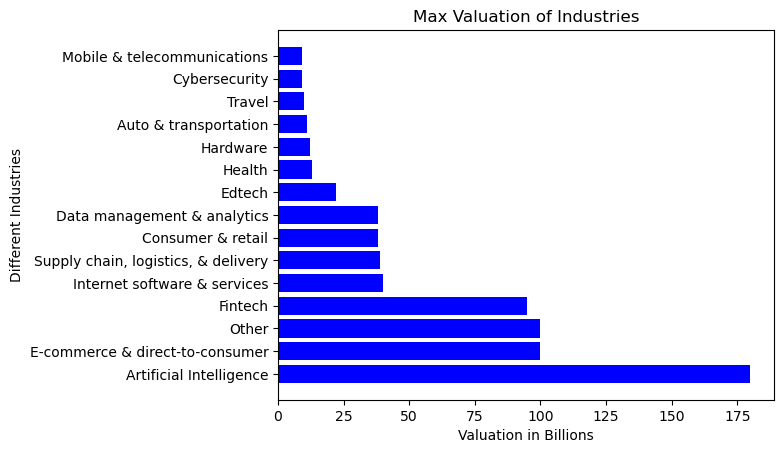

In [29]:
# Creating bar plot with the various industries as the categories of the bars and the maximum valuation for each industry as the height of the bars

plt.barh(y=max_valuation_per_industry['Industry'], width=max_valuation_per_industry['Valuation Number'], color='Blue')

# Setting title

plt.title('Max Valuation of Industries')

# Setting x-axis label

plt.xlabel('Valuation in Billions')


# Setting y-axis label

plt.ylabel('Different Industries')

# Displaying the plot

plt.show()

### Visualizing the time it took companies to reach unicorn status

Using the `companies` dataset, I will create a bar plot to visualize the average number of years it took companies to reach unicorn status with respect to when they were founded. 

C:\Users\farru\AppData\Local\Temp\ipykernel_13500\442510562.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(data= companies, x=companies['Year Founded'], y=companies['Years To Join'], ci= False)


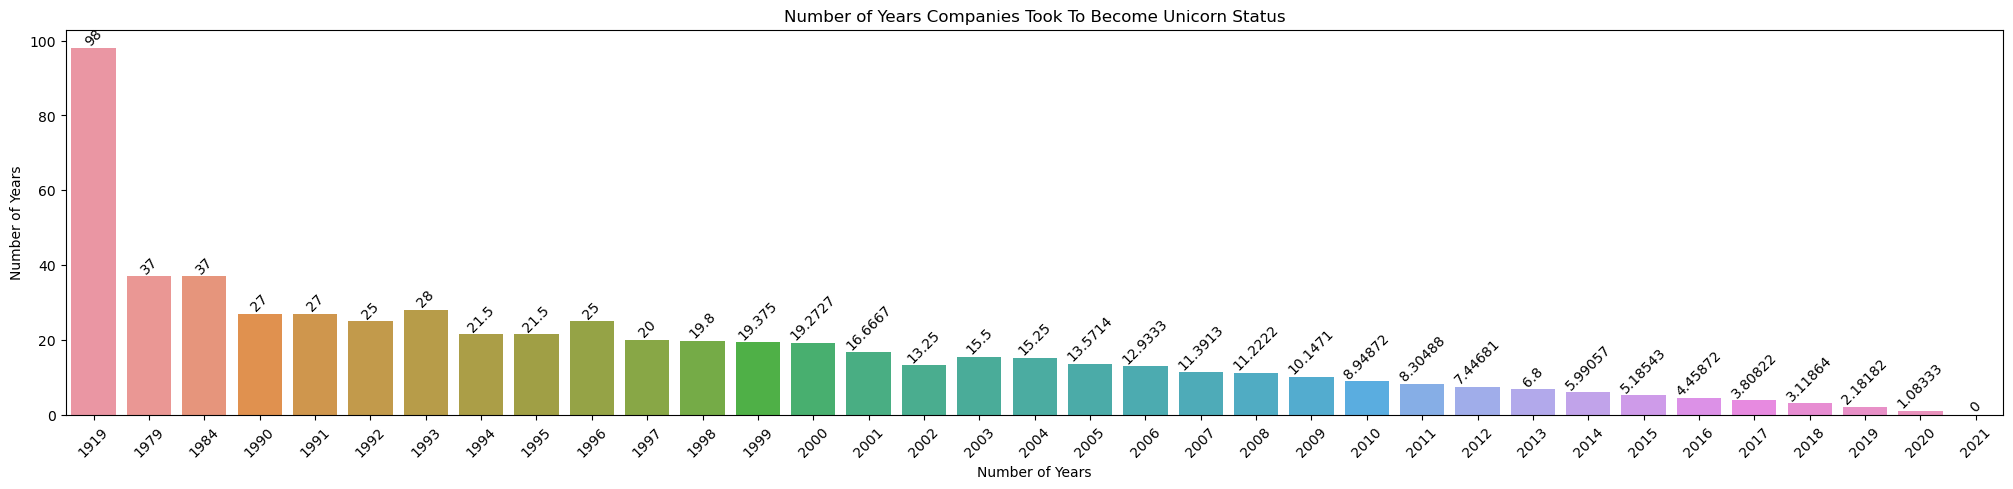

In [30]:
# Setting the size of the plot.

plt.figure(figsize= (25,5))

# Creating bar plot to visualize the average number of years it took companies to reach unicorn status with respect to when they were founded.

ax = sns.barplot(data= companies, x=companies['Year Founded'], y=companies['Years To Join'], ci= False)

# Setting title

plt.title("Number of Years Companies Took To Become Unicorn Status")

# Setting x-axis label

plt.xlabel("Number of Years")

# Setting y-axis label

plt.ylabel("Number of Years")

# Rotating the labels on the x-axis as a way to avoid overlap in the positions of the text.  

plt.xticks(rotation = 45)

# Displaying Labels on the bars

for i in ax.containers:
    ax.bar_label(i, rotation = 45)

# Displaying the plot.

plt.show()


### Visualizing the number of companies that joined per interval 

Using the subset of companies joined in the year of interest, grouped by the time interval of your choice, creating a bar plot to visualize the number of companies that joined per interval for the year of 2021. 
To gain more insight on the year of that interests you, first I will filter the dataset by that year and save the resulting subset into a new variable. 

In [31]:
# Filtering dataset by a year of your interest (in terms of when companies reached unicorn status) & saving the resulting subset in a new variable. 

companies_2021 = companies[companies['Year Joined'] == 2021]

# Display the first few rows of the subset to confirm that it was created.

companies_2021.head(1)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,month name,Years To Join,Valuation Number
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",2021,April,6,20


In [32]:
# Now I will insert a column that contains the time interval that each data point belongs to, as needed.
# Plus, I will group by the time interval, aggregate by counting companies that joined per interval of that year & finally save the 
# resulting DataFrame in a new variable.

companies_2021['Week Reached Unicorn'] = companies_2021['Date Joined'].dt.strftime('%Y-W%V')
companies_by_week_2021 = companies_2021['Week Reached Unicorn'].groupby(companies_2021['Week Reached Unicorn']).count().reset_index(name= 'Counts')

# Display the first few rows of the new DataFrame to confirm that it was created

companies_by_week_2021.head()

C:\Users\farru\AppData\Local\Temp\ipykernel_13500\2340089129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_2021['Week Reached Unicorn'] = companies_2021['Date Joined'].dt.strftime('%Y-W%V')


,Week Reached Unicorn,Counts
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


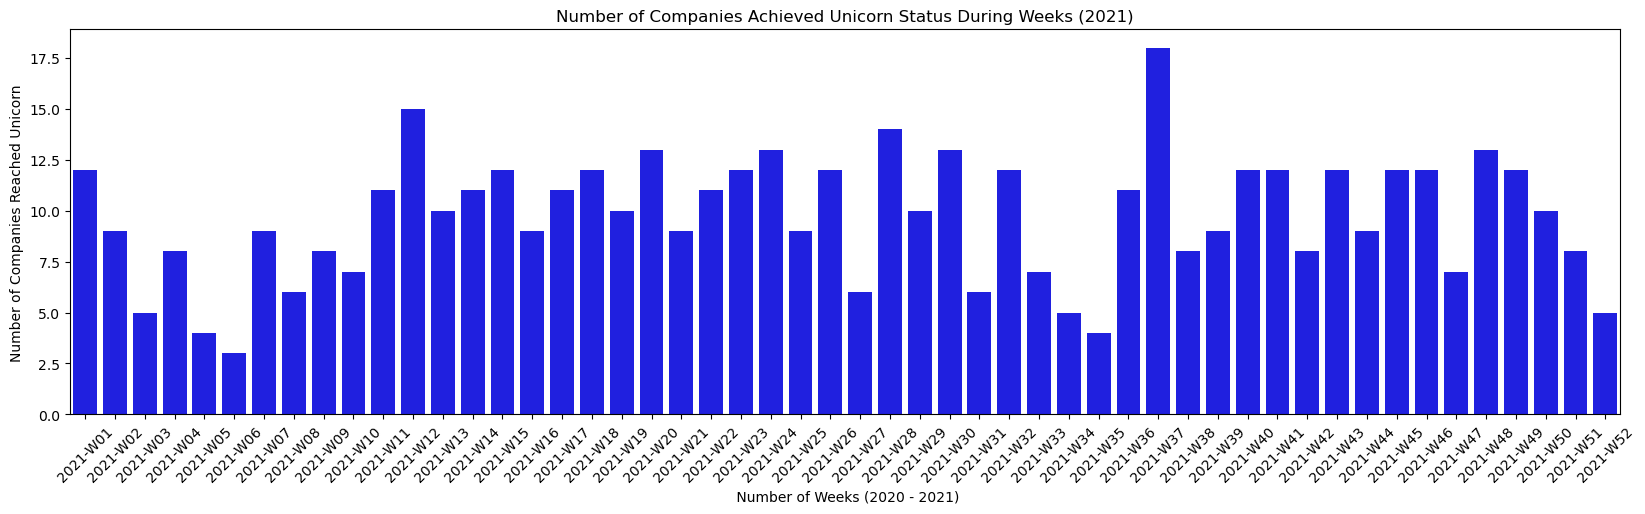

In [33]:
# Setting the size of the plot.

plt.figure(figsize= (20,5))

# Creating bar plot to visualize number of companies that joined per interval for the year of interest.

ax = sns.barplot(data= companies_by_week_2021, x='Week Reached Unicorn', y='Counts', color= 'blue')

# Setting the x-axis label.

plt.xlabel(" Number of Weeks (2020 - 2021)")

# Setting the y-axis label.

plt.ylabel("Number of Companies Reached Unicorn")

# Setting the title.

plt.title("Number of Companies Achieved Unicorn Status During Weeks (2021)")

# Rotating labels on the x-axis as a way to avoid overlap in the positions of the text.  

plt.xticks(rotation = 45)

# Displaying the plot.

plt.show()

### Visualizing the time it took companies to become unicorns

Using the `companies` dataset, I will create a box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined. 

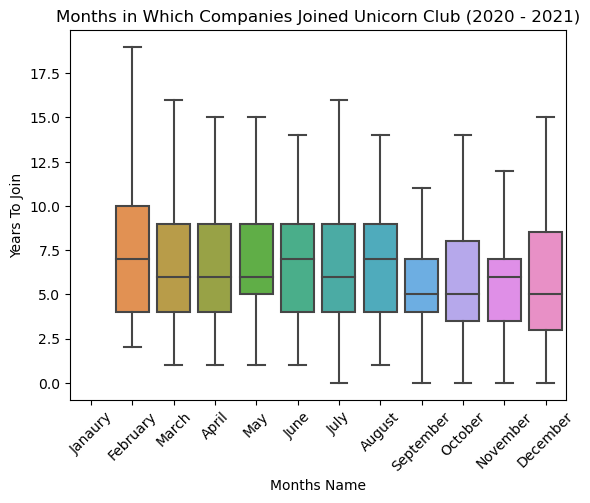

In [34]:
# Define a list that contains months in chronological order.

months_order = ['Janaury', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Making sure the x-axis goes in chronological order by month, using the list I defined previously.

sns.boxplot(data= companies, y= companies['Years To Join'] , x=companies['month name'], order= months_order, showfliers= False)

# Setting the title of the plot.

plt.title('Months in Which Companies Joined Unicorn Club (2020 - 2021)')

# Rotating labels on the x-axis as a way to avoid overlap in the positions of the text.  

plt.xticks(rotation = 45)

# Setting X and Y axis Labels

plt.xlabel('Months Name')
plt.ylabel('Years To Join')

# Displaying the plot.

plt.show()


### Visualize the average valuation over the quarters

Using the subset of companies that joined in the years of interest, create a grouped bar plot to visualize the average valuation over the quarters, with two bars for each time interval. There will be two bars for each time interval. This allows you to compare quarterly values between the two years.

In [35]:
# Following are the steps I took to generate the required DataFrame:
# Step 1. Filtering by the additional year to create a subset that consists of companies that joined in that year.
# Step 2. Concatenating that new subset with the subset that I defined previously.
# Step 3. As needed, adding a column that contains the time interval that each data point belongs to, 
#         in the concatenated DataFrame.
# Step 4. Transforming the `Valuation` column as needed.
# Step 5. Grouping by the time interval.
#         Aggregating by computing average valuation of companies that joined per interval of the corresponding year.
#         Saving the resulting DataFrame in a new variable.

companies_2020 = companies[companies['Year Joined'] == 2020]

companies_2020_2021_quarterly = pd.concat([companies_2020, companies_2021.drop(columns=['Week Reached Unicorn'])])

companies_2020_2021_quarterly['Quarter Joined'] = companies_2020_2021_quarterly['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q')

companies_2020_2021_quarterly['Average Valuation'] = companies_2020_2021_quarterly['Valuation'].str.lstrip('$').str.rstrip('B').astype('float')

companies_by_quarter_2020_2021 = companies_2020_2021_quarterly[['Quarter Joined', 'Average Valuation']].groupby(['Quarter Joined'])['Average Valuation'].mean().round(decimals= 2).reset_index()

# Display the first few rows of the new DataFrame to confirm that it was created.

companies_by_quarter_2020_2021.head()

,Quarter Joined,Average Valuation
0,2020-Q1,3.44
1,2020-Q2,3.76
2,2020-Q3,3.90
3,2020-Q4,3.70
4,2021-Q1,2.77


C:\Users\farru\AppData\Local\Temp\ipykernel_13500\2741329299.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data= companies_2020_2021_quarterly, x=companies_2020_2021_quarterly['Qtr Joined'], y=companies_2020_2021_quarterly['Average Valuation'], ci= False,


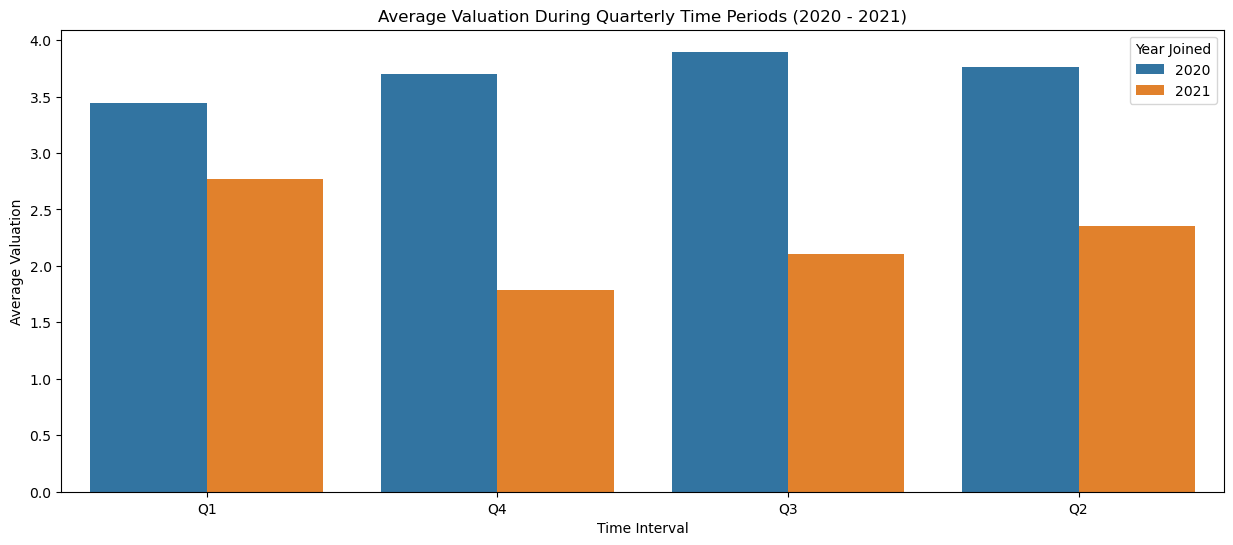

In [36]:
# Using slicing, extracting the year component and the time interval that you specified, and saving them by adding two new columns into the subset. 

companies_2020_2021_quarterly['Year Joined'] = companies_2020_2021_quarterly['Quarter Joined'].str[:4]
companies_2020_2021_quarterly['Qtr Joined'] = companies_2020_2021_quarterly['Quarter Joined'].str[-2:]
companies_2020_2021_quarterly = companies_2020_2021_quarterly.reset_index()

# Setting the size of the plot.

plt.figure(figsize= (15,6))

# Creating a grouped bar plot.

sns.barplot(data= companies_2020_2021_quarterly, x=companies_2020_2021_quarterly['Qtr Joined'], y=companies_2020_2021_quarterly['Average Valuation'], ci= False, 
            hue=companies_2020_2021_quarterly['Year Joined'])

# Setting the x-axis label.

plt.xlabel("Time Interval")

# Setting the y-axis label.

plt.ylabel("Average Valuation")

# Setting the title.

plt.title("Average Valuation During Quarterly Time Periods (2020 - 2021)")



# Display the plot.

plt.show()



### Visualizing top 20 non-big-4 countries

For each country, summing the valuations of all companies in that country, then sorting the results in descending order by summed valuation. Assigning the results to a variable called `national_valuations`.

In [37]:
# Grouping the data by`Country/Region`

national_valuation = companies[['Country/Region', 'Valuation Number']].groupby(companies['Country/Region']).sum().sort_values(by= 'Valuation Number', ascending= False)

# Print the top 15 values of the DataFrame.

national_valuation = national_valuation.reset_index()

national_valuation.head(5)

C:\Users\farru\AppData\Local\Temp\ipykernel_13500\3158227175.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  national_valuation = companies[['Country/Region', 'Valuation Number']].groupby(companies['Country/Region']).sum().sort_values(by= 'Valuation Number', ascending= False)


,Country/Region,Valuation Number
0,United States,1922
1,China,695
2,India,196
3,United Kingdom,195
4,Germany,72


Using this grouped and summed data to plot a barplot. However, to meet the needs of the stakeholder, I must first remove the United States, China, India, and the United Kingdom. Removing these countries from `national_valuations` and reassign the results to a variable called `national_valuations_no_big4`.

In [38]:
# Remove outlying countries

national_valuations_no_big4 = national_valuation.iloc[4:]

national_valuations_no_big4.head()

,Country/Region,Valuation Number
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


### Alternative approach (optional)

I can also use `isin()` to create a Boolean mask to filter out specific values of the `Country/Region` column. In this case, this process is longer and more complicated than simply using the iloc[] statement. However, there will be situations where this is the most direct approach. 

In [39]:
mask2 = ~national_valuation['Country/Region'].isin(['United States', 'China', 'India', 'United Kingdom'])

national_valuations_no_big4 = national_valuation[mask2]

national_valuations_no_big4.head()

,Country/Region,Valuation Number
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


Now, the data is ready to reveal the top 20 non-big-4 countries with the highest total company valuations. 

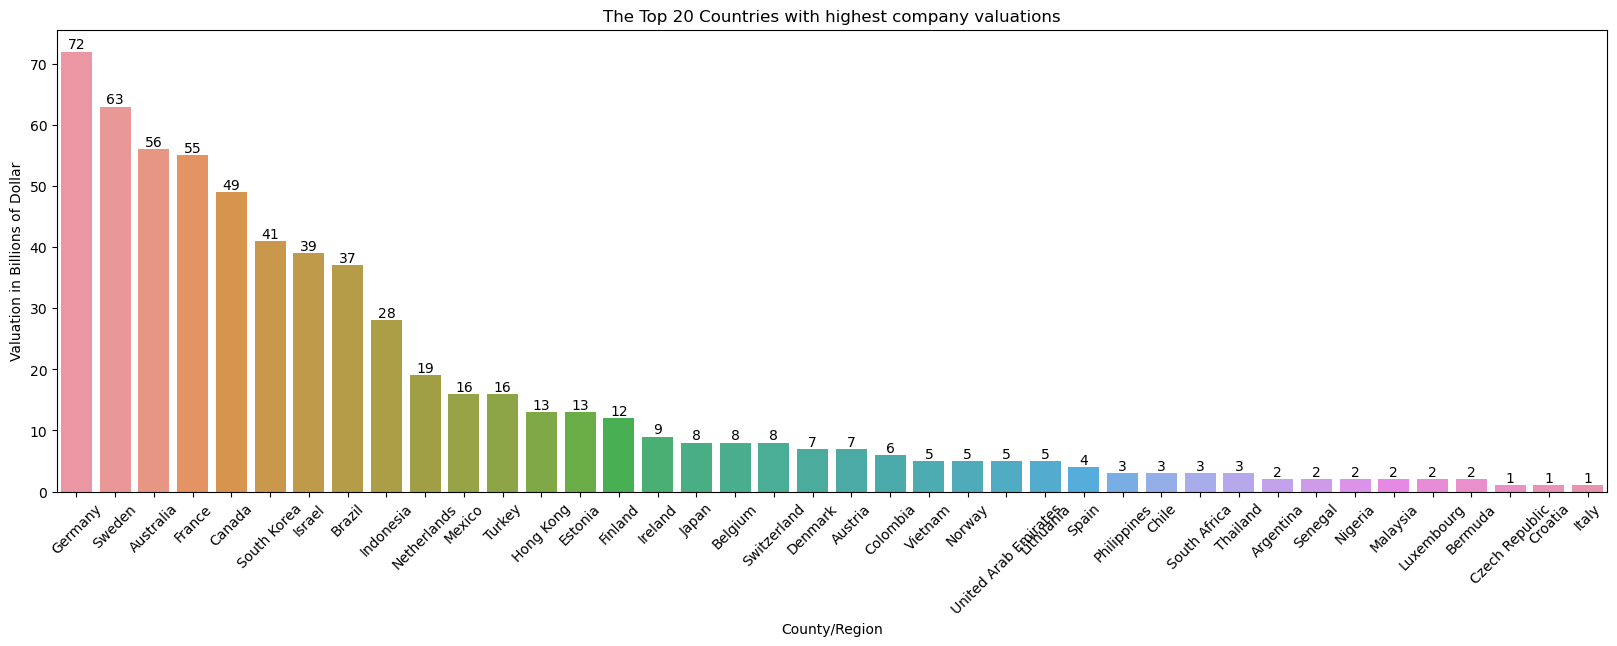

In [40]:
# Creating a barplot to compare the top 20 countries with highest company valuations.

plt.figure(figsize= (20,6))
ax = sns.barplot(data= national_valuations_no_big4, x=national_valuations_no_big4['Country/Region'], y=national_valuations_no_big4['Valuation Number'])
plt.xlabel("County/Region")
plt.ylabel("Valuation in Billions of Dollar")
plt.title("The Top 20 Countries with highest company valuations")
plt.xticks(rotation=45)

# Show Labels

for i in ax.containers:
    ax.bar_label(i,)

# Show the plot.

plt.show()

The investor has also asked for a global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a.k.a. "big-four countries").


In [41]:
# Plot the sum of valuations per country.

px.scatter_geo(national_valuations_no_big4, locations= 'Country/Region', size= 'Valuation Number', locationmode="country names", color='Country/Region')

# Sep 5: Findings and Conclusion

**What findings would I share with others?**

- There are 1074 unicorn companies represented in this dataset.
- Companies which come under Artificial Intelligence have higher valuation than other categories of companies.
- In 1919, companies used to take decades to reach unicorn status. But as years passed on, the duration to acquire a unicorn status decreased significantly. Companies could take longer to achieve unicorn status for several reasons, including requiring more funding or taking longer to develop a business model. 
- In September 2021, around 17 companies reached unicorn status: the highest for the whole year.
- According to the box plot I generated for 2020 and 2021, most of the companies reached unicorn status during June, July, and August and took four to nine years. It must be due to the switching of a new fiscal year.
- Valuation of the companies in 2020 was much higher than the ones which entered this category in the next year. The reason of that decrease in valuation might be due to closure / decrease in economic activities during the covid-19 phase.
- If we eliminate the big 4 countries, most of the German, Swedish, Australian companies have higher valuations than other countries.
- 2015 is the year when the highest number of unicorn companies were founded in the world.
- One of the bar plots created shows that the average valuation of companies that joined in 2020 is highest in the third quarter of the year, whereas the average valuation of companies that joined in 2021 is highest in the first quarter of the year.

**What recommendations would you share with stakeholders based on these findings?**

It may be helpful to focus more on industry specifics. Next steps to consider:
- Identify the main industries that the investing firm is interested in investing in. 
- Select a subset of this data that includes only companies in those industries. 
- Analyze that subset more closely. Determine which companies have higher valuation but do not have as many investors currently. They may be good candidates to consider investing in. 
- According to data analysis that was conducted on a dataset of 1074 unicorn companies, companies that joined in the months of September and October tended to take less time to become unicorns.
- Another finding was that many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. So if the stakeholders want to invest in companies founded in 2021, it would be a good idea to consider companies that belong to these industries, as they may be strong candidates for becoming unicorns.
- It was also discovered that the average valuation of companies that joined in 2021 is highest in the first quarter of the year, and the average valuation of companies that joined in 2020 is the third quarter of the year. When considering companies that newly join in the future, it would be worth closely looking at companies that join in the first and third quarters of the year. 
- The data can be analyzed further to gather more insights that are specific to the interests of the investing firm and the stakeholders. 